In [1]:
# import our libraries
import sys
import json
import pandas as pd
import seaborn as sb
import sys
import PyQt5
import PyQt5.QtWidgets as qw
import PyQt5.QtCore as qc
import PyQt5.QtGui as qg
from spectra import spectra as spc
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib
%matplotlib qt
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})


In [2]:
adata = sc.read_h5ad("../new_data.h5ad")

#with open("../spectra/annotations_2.json", "rb") as file:
     #annotations = json.load(file)

In [68]:
df = pd.DataFrame(adata.obsm["SPECTRA_cell_scores"])
df["cell_type"] = adata.obs["Bassez_cellType"].values
df = df.groupby("cell_type").mean()
sb.set(font_scale = 0.9)

In [107]:
g = sb.clustermap(df, row_cluster = False, xticklabels = 0, col_cluster = True, cbar_pos = None, dendrogram_ratio = (0, 0.2), standard_scale = 0, linewidth = 0, figsize=(6,4))

g.ax_heatmap.set_xlabel("Factors")
g.ax_heatmap.set_ylabel("Cell type")

g.figure.colorbar(g.ax_heatmap.collections[0], ax = g.ax_heatmap, location = 'bottom')

C:\Users\Brian\AppData\Local\Temp\ipykernel_2548\2186610671.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  g.figure.colorbar(g.ax_heatmap.collections[0], ax = g.ax_heatmap, location = 'bottom')


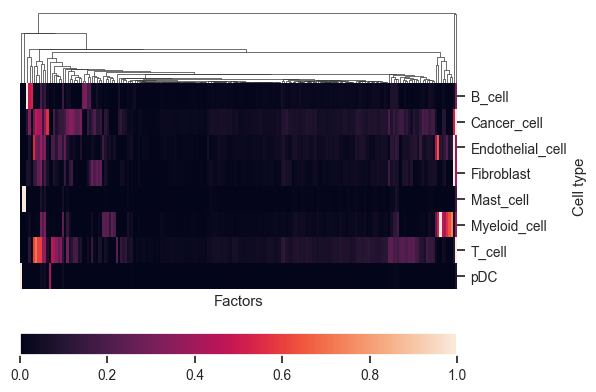

In [109]:
g.figure

In [53]:
def colorByFactor():
    factorList = []
    for i in range(len(adata.uns["SPECTRA_markers"])):
        factorNames = ', '.join(adata.uns["SPECTRA_markers"][i][:5])
        factorString = "Factor " + str(i) + ": " + factorNames
        factorList.append(factorString)
    return factorList

colorByFactor()